## Import Modules

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load the Dataset

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\jangedoo\utkface-new\versions\1


In [8]:
BASE_DIR = path

In [9]:
pip install IProgress

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import os
from tqdm import tqdm

# Specify the base path
BASE_DIR = path

image_paths = []
age_labels = []
gender_labels = []

# Function to process images in a directory
def process_directory(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path) and filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            temp = filename.split('_')
            try:
                age = int(temp[0])
                gender = int(temp[1])
                image_paths.append(file_path)
                age_labels.append(age)
                gender_labels.append(gender)
            except (ValueError, IndexError):
                print(f"Skipping file {filename} due to unexpected format")

# Get the list of subdirectories
subdirs = [d for d in os.listdir(BASE_DIR) if os.path.isdir(os.path.join(BASE_DIR, d))]

# Sort the subdirectories (optional, depending on your naming convention)
subdirs.sort()

# Check if there are at least two subdirectories
if len(subdirs) >= 2:
    # Get the second subdirectory
    second_dir = os.path.join(BASE_DIR, subdirs[1])
    
    # Process only the second directory
    print(f"Processing directory: {second_dir}")
    process_directory(second_dir)
else:
    print("There is no second directory in the specified path.")

print(f"Processed {len(image_paths)} valid images")

Processing directory: C:\Users\admin\.cache\kagglehub\datasets\jangedoo\utkface-new\versions\1\crop_part1
Processed 9780 valid images


In [13]:
# convert to dataframe
data = pd.DataFrame()
data['photo'], data['years'], data['sex'] = image_paths, age_labels, gender_labels
data.head()

,photo,years,sex
0,C:\Users\admin\.cache\kagglehub\datasets\jange...,100,1
1,C:\Users\admin\.cache\kagglehub\datasets\jange...,100,1
2,C:\Users\admin\.cache\kagglehub\datasets\jange...,101,1
3,C:\Users\admin\.cache\kagglehub\datasets\jange...,10,0
4,C:\Users\admin\.cache\kagglehub\datasets\jange...,10,0


In [11]:
# map labels for gender
gender_dic = {0:'Male', 1:'Female'}

## Exploratory Data Analysis

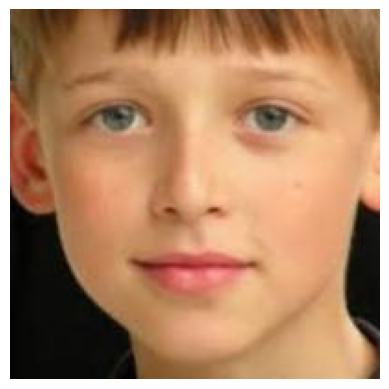

In [14]:
from PIL import Image
img = Image.open(data['photo'][3])
plt.axis('off')
plt.imshow(img);

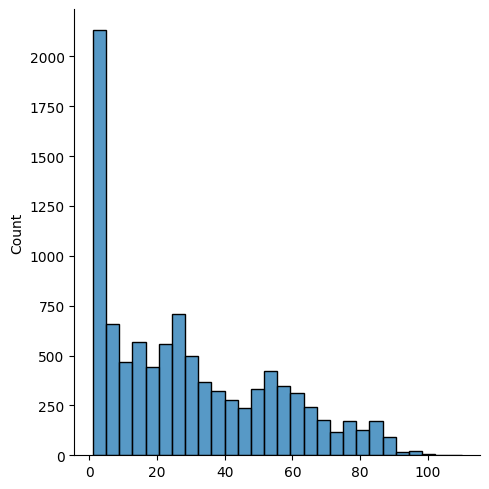

In [15]:
import seaborn as sns
import numpy as np

# Convert the Pandas Series to a NumPy array
age_array = data['years'].to_numpy()

# Use the newer displot function
sns.displot(age_array)

<AxesSubplot:xlabel='sex'>

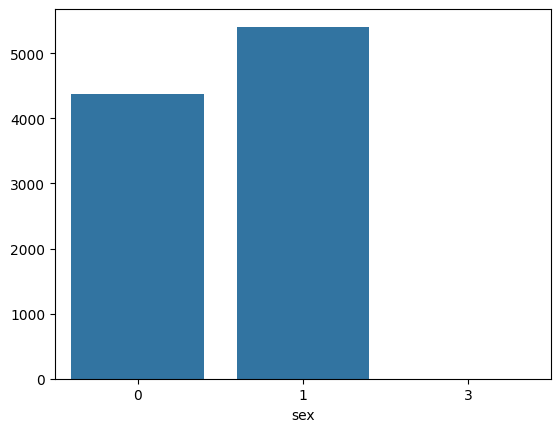

In [16]:
gender_counts = data['sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)

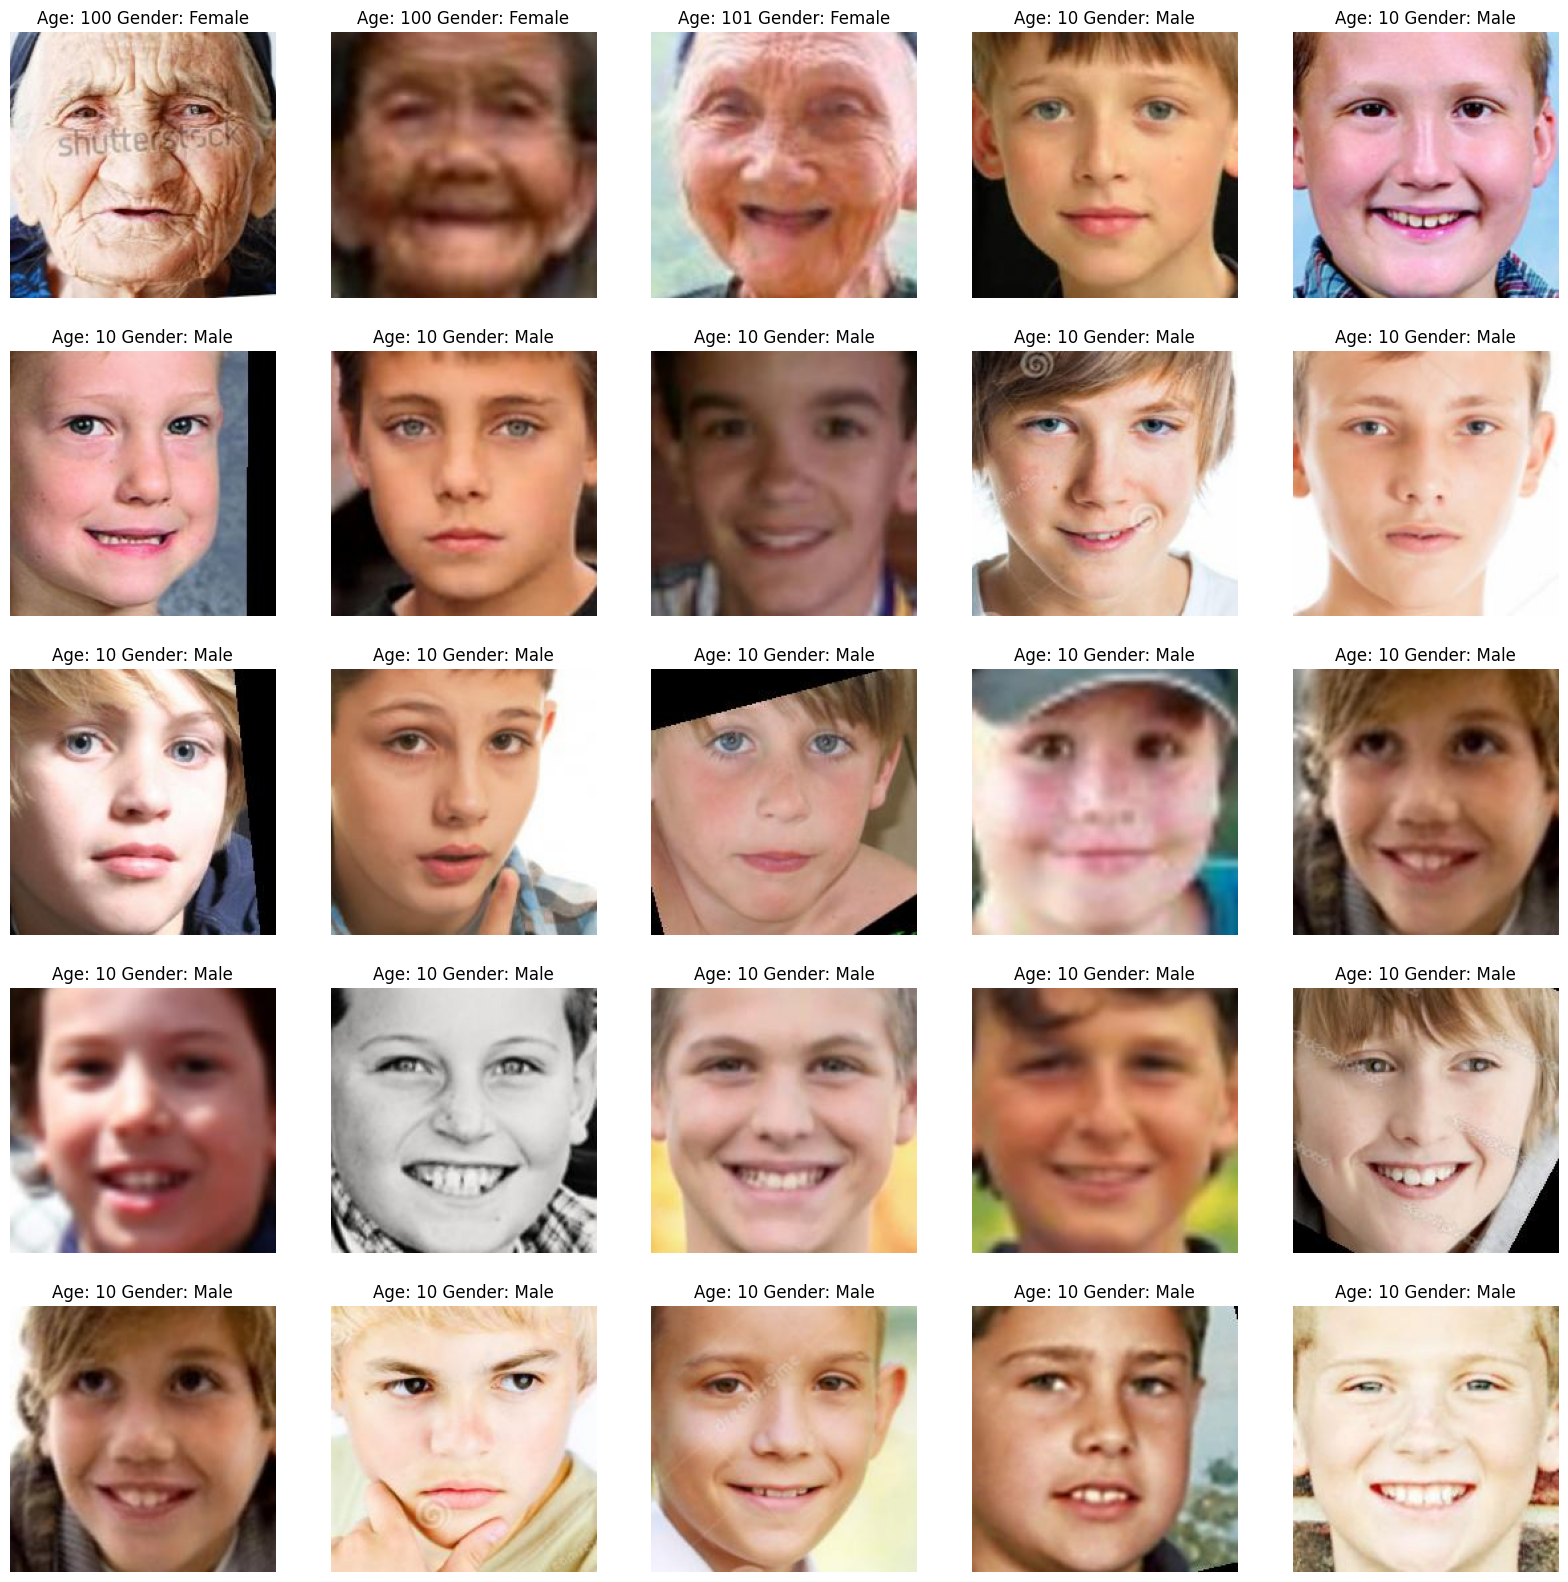

In [23]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

## Feature Extraction

In [17]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [18]:
X = extract_features(data['photo'])

100%|█████████████████████████████████████████████████████████████████████████████| 9780/9780 [00:14<00:00, 694.51it/s]


In [19]:
X.shape

(9780, 128, 128, 1)

In [20]:
# normalize the images
X = X/255.0

In [21]:
y_gender = np.array(data['sex'])
y_age = np.array(data['years'])

In [22]:
input_shape = (128, 128, 1)

## Model Creation

In [23]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.4) (dense_1)
dropout_2 = Dropout(0.4) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [26]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
pip install pydotplus


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

## Plot the Results

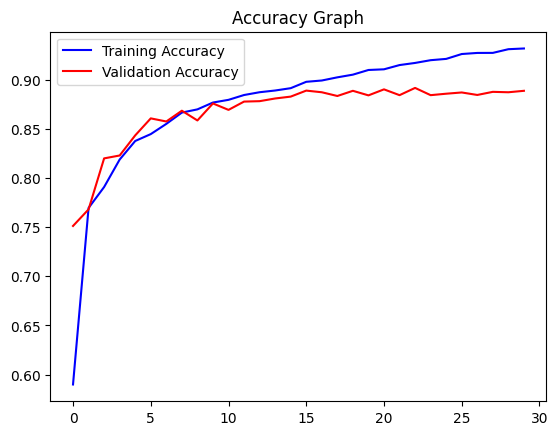

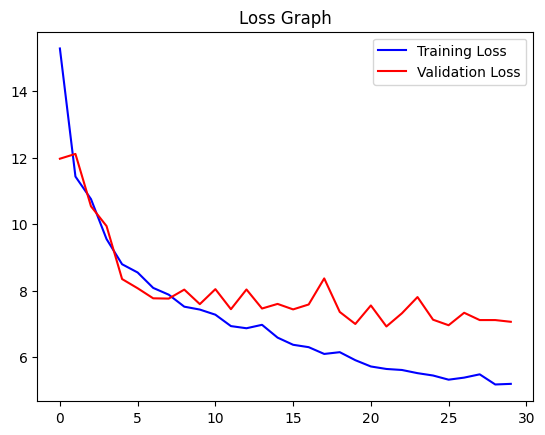

In [21]:
# plot results for gender
precision = performance_record.history['sex_output_precision']
val_precision = performance_record.history['val_sex_output_precision']
cycles = range(len(precision))
plt.plot(cycles, precision, 'b', label='Training Precision')
plt.plot(cycles, val_precision, 'r', label='Validation Precision')
plt.title('Precision Graph')
plt.legend()
plt.figure()
error = performance_record.history['error']
val_error = performance_record.history['val_error']
plt.plot(cycles, error, 'b', label='Training Error')
plt.plot(cycles, val_error, 'r', label='Validation Error')
plt.title('Error Graph')
plt.legend()
plt.show()


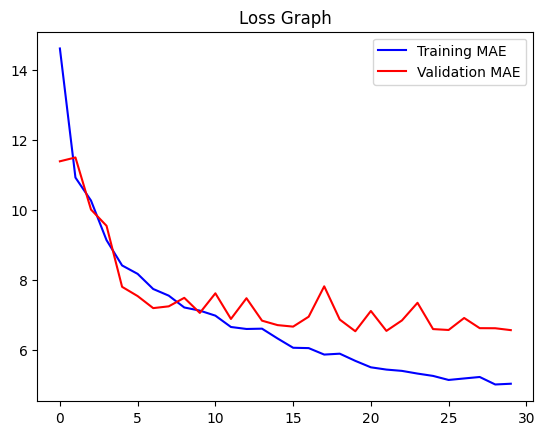

In [22]:
error_rate = performance_log.history['years_output_mean_absolute_error']
validation_error_rate = performance_log.history['val_years_output_mean_absolute_error']
iterations = range(len(error_rate))
plt.plot(iterations, error_rate, 'b', label='Training Mean Absolute Error')
plt.plot(iterations, validation_error_rate, 'r', label='Validation Mean Absolute Error')
plt.title('Error Rate Visualization')
plt.legend()
plt.show()

# Prediction with Test Data

Original Gender: Female Original Age: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Gender: Female Predicted Age: 3


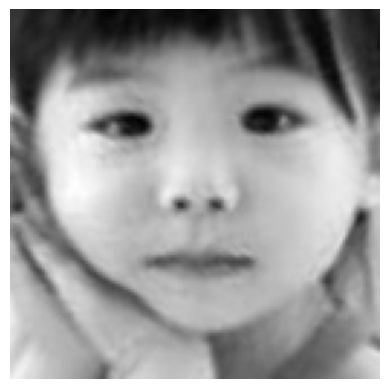

In [26]:
sample_id = 100
print("Original Sex:", sex_mapping[y_sex[sample_id]], "Original Age:", y_age[sample_id])
analysis = ai_model.analyze(data_array[sample_id].reshape(1, 128, 128, 1))
analyzed_sex = sex_mapping[round(analysis)]
analyzed_age = round(analysis)
print("Analyzed Sex:", analyzed_sex, "Analyzed Age:", analyzed_age)
plt.axis('off')
plt.imshow(data_array[sample_id].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Gender: Male Predicted Age: 33


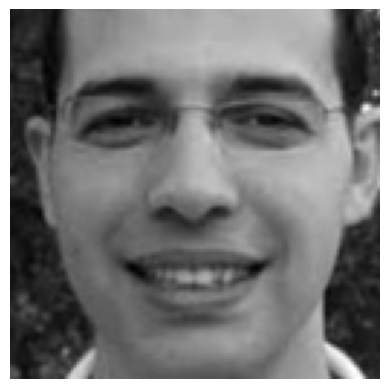

In [24]:
photo_number = 3000
print("Actual Sex:", sex_categories[y_sex[photo_number]], "Actual Age:", y_years[photo_number])
result = classifier.estimate(dataset[photo_number].reshape(1, 128, 128, 1))
estimated_sex = sex_categories[round(result)]
estimated_years = round(result)
print("Estimated Sex:", estimated_sex, "Estimated Age:", estimated_years)
plt.axis('off')
plt.imshow(dataset[photo_number].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Gender: Male Predicted Age: 37


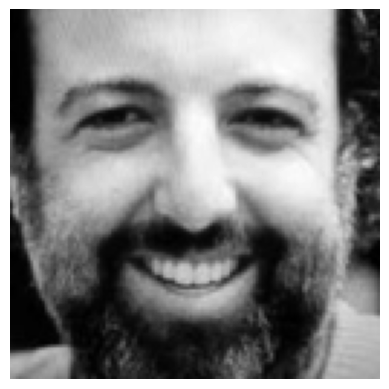

In [25]:
sample_id = 10000
print("Actual Sex:", sex_mapping[y_sex[sample_id]], "Actual Age:", y_years[sample_id])
prediction = algorithm.forecast(data_set[sample_id].reshape(1, 128, 128, 1))
predicted_sex = sex_mapping[round(prediction)]
predicted_years = round(prediction)
print("Forecasted Sex:", predicted_sex, "Forecasted Age:", predicted_years)
plt.axis('off')
plt.imshow(data_set[sample_id].reshape(128, 128), cmap='gray');

In [33]:
def preprocess_frame(frame, target_size=(128, 128)):
    frame_resized = cv2.resize(frame, target_size)
    frame_normalized = frame_resized / 255.0
    return np.expand_dims(frame_normalized, axis=0)

In [ ]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Preprocess the frame
    input_frame = preprocess_frame(frame)

    # Make predictions
    gender_pred, age_pred = model.predict(input_frame)
    gender = "Male" if gender_pred[0][0] > 0.5 else "Female"
    age = int(age_pred[0][0])

    # Overlay predictions on the frame
    text = f"Gender: {gender}, Age: {age}"
    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow("Gender and Age Detection", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()